# Exercise 2 in Classical Mechanics

**By Martin Johnsrud**

In [1]:
import numpy as np
from numpy import pi, cos, exp, sin
from cmath import sqrt
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
font = {
    'family' : 'serif', 
    'weight' : 'normal', 
    'size'   : 16
}
    
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rc("lines", lw = 1.5)
plt.rc('font', **font)
plt.rc("legend", fontsize = 12)

m = 1
l = 2
g = 9.81
w0 = abs(sqrt(g / l / m))
theta_0 = 0.2
thetaDot_0 = 0
Fd = 0.2

# 1. Dampend harmonic oscillator

## Analytical solution

The equation for the damped harmonic oscillator is described by the equation

$$
    \frac{\mathrm{d}^2\theta}{\mathrm{d} t^2} + q \frac{\mathrm{d}\theta}{\mathrm{d} t} + \omega_0^2 \theta = 0, \quad \omega_0 = \sqrt{g / l}
$$

with a trial solution $\theta = e^{\lambda t}$, we get

$$
    \lambda^2 + q\lambda + \omega_0^2 = 0 \quad \implies \lambda_{\pm} = -q/2 \pm \sqrt{(q/2)^2 - \omega_0^2} = -q/2 \pm \zeta = -q/2 \pm i\omega
$$
The introduction of $\omega$ and $\zeta$ is to always handle real variables, and making what the solutions does more obious.

#### 1. Assuming $\lambda_+ = \lambda_- = -q/2$, 

We get solutions of the form
$$
    (A + Bt)e^{-tq/2}.
$$

boundary conditions gives

$$
    A = \theta_0, B = \theta_0 q/2 + \dot\theta_0,
$$
so that the solution for **critical dampening is**

$$
    \theta(t) = (\theta_0 + (\theta_0q/2 + \dot\theta_0)t)e^{-tq/2} 
$$


#### 2. Assuming $\lambda_+ \neq \lambda_-$,

the general solution is of the form
$$
  \theta(t) = A e^{\lambda_+ t} + B e^{\lambda_- t}
$$

with boundary conditions $\theta(0) = \theta_0, \dot\theta(0) = \dot\theta_0$, we get

$$
    A + B = \theta_0, \quad  B \lambda_- = -A \lambda_+ + \dot \theta_0, \\
        A = -\frac{\theta_0 \lambda_- - \dot \theta_0}{\lambda_+ - \lambda_- } = A = -\frac{\theta_0 \lambda_- - \dot \theta_0}{2i \omega}, \quad B = \frac{\theta_0 \lambda_+ - \dot \theta_0}{\lambda_+ - \lambda_- } = \frac{\theta_0 \lambda_+ - \dot \theta_0}{2i \omega},
$$

**2.1 Assuming** $\omega_0 > q/2$, we get that $\omega \in \mathbb{R}$, so that $\lambda_+^* = \lambda_-$, and thus $A^* = B \implies i(A - B) \in \mathbb{R}$. This means, with
$$
A - B = \frac{\theta_0(\lambda_- + \lambda_+) + 2\dot \theta_0 }{ (\lambda_- - \lambda_+)} = \frac{\theta_0 \mathrm{Re}(\lambda_-) + \theta_0 }{\mathrm{Im}(\lambda_-)} = -i\frac{-\theta_0q/2 + \dot\theta_0 }{\omega}, 
$$
The solution can be written as
$$
\theta(t) = e^{-tq/2} \big( (A+B)cos(\omega t) + (A-B) sin(\omega t)\big).
$$

With some algebra, we can write write the solution of **underdamped oscillations** in the form, 
$$
    C = \sqrt{\theta_0^2 + \bigg( \frac{\theta_0q/2 - \dot\theta_0 }{\omega}\bigg)^2}, \quad \phi = \arctan\bigg( \frac{\theta_0q/2 - \dot\theta_0 }{\omega\theta_0}\bigg) \\
    \theta(t) = C e^{-tq / 2} \cos(\omega t + \phi)
$$

**2.2 Assuming** $\omega_0 < q/2$, we have $\lambda_{\pm}, A, B\in \mathbb{R}$, and $i\omega = \zeta \in \mathbb{R} \setminus \{0\}$. Thus, we can write the solution for **overdamped oscillations** as
$$
    \theta(t) = e^{-tq/2}(A e^{t\zeta} + B e^{-t \zeta}).
$$

In [3]:
# Implementation of the analytical solution, given parametres an initial conditions
# Initial condititions and w0 is set in the first code box (?) and never touched after

def getTheta(q, theta_0 = 0.2, thetaDot_0 = 0):
    # Checkin assumption 1
    if q/2 == w0:
        print("Critically damped")
        return lambda x : exp(- x*q/2) * ( theta_0 + x*(theta_0 * q / 2 + thetaDot_0))
    
    if w0 > q / 2:
        # Checking assumption 2.1
        w = sqrt(w0**2 - (q/2)**2)
        assert(w.imag == 0 and not (w == 0))
        print("Underdamped")
        
        C = sqrt(theta_0**2 + ((theta_0*q / 2 - thetaDot_0) / w)**2)
        # arctan2 does not accept complex numbers, even though Im(z) = 0
        phi = np.arctan2(((theta_0*q / 2 - thetaDot_0) / w).real, (theta_0).real)
        return lambda x :  C * exp(- x*q/2) * cos(w*t - phi)

    # Checking assumption 2.2
    z = sqrt((q/2)**2 - w0**2)
    assert(z.imag == 0 and not (z == 0))
    print("Overdamped")
    
    lambda_p = -q/2 + z
    lambda_m = -q/2 - z
    A = - (theta_0 * lambda_m - thetaDot_0) / (2 * z)
    B = (theta_0 * lambda_p - thetaDot_0) / (2 * z)
    return lambda x: exp(- x*q/2) * (A * exp(z*x) + B * exp(-z*x))

In [4]:
def plotAnalytical(t, thetas, qs, title = ""):
    n = len(qs)
    fig, ax = plt.subplots(1, n, figsize = (15, 4), sharey = True)
    fig.suptitle(title, y = 1.05)
    for i in range(n):
        # Getting warnigs, even though im(z) =0
        ax[i].plot(t, thetas[i](t).real)
        # Error accurs when tryning to mix format and {}'s for latex
        ax[i].set_title("$q = {:.3f}$".format(qs[i]) + "$\\, \\mathrm{s}^{-1}$")
        ax[i].set_xlabel("$t / [\\mathrm{s}]$")
    
    ax[0].set_ylabel("$\\theta$")

Underdamped
Critically damped
Overdamped


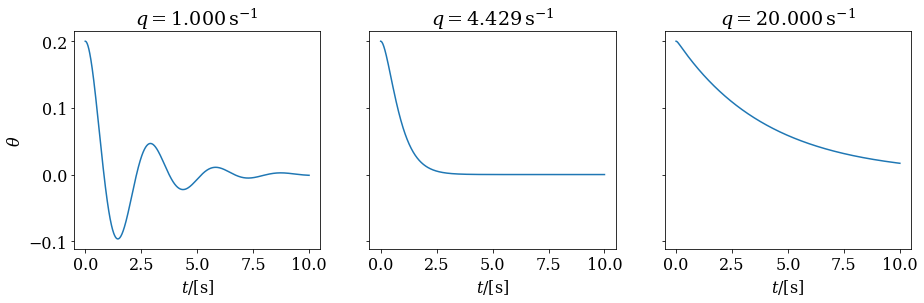

In [5]:
t = np.linspace(0, 10, 1000)
qs = [1, 2 * w0, 20]
thetas = []

for i in range(len(qs)):
    thetas.append(getTheta(qs[i]))

plotAnalytical(t, thetas, qs)

### Numerics

The equation can be written in the form 

$$
    y =
    \begin{pmatrix}
        \theta \\
        \dot \theta
    \end{pmatrix}, \quad
    f(y) = \dot y =
    \begin{pmatrix}
        \dot \theta \\
        \ddot \theta
    \end{pmatrix} = 
    \begin{pmatrix}
        \dot \theta \\
        -q \dot \theta - \omega_0^2 \theta
    \end{pmatrix}.
$$

and can be solved numerically with Runge-Kutta 4, given by

\begin{align*}
    k_1 &= f(y_n) ,\\
    k_2 &= f(y_n + k_1 / 2)\Delta t, \\
    k_3 &= f(y_n + k_2 / 2)\Delta t, \\
    k_4 &= f(y_n + k_3)\Delta t, \\
    y_0 = 
    \begin{pmatrix}
        \theta_0 \\
        0
    \end{pmatrix}, \quad
    y_{n + 1} &= y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4).
\end{align*}

In [6]:
def f(y, *args):
    (q,) = args
    return np.array([
        y[1],
        -q * y[1] - w0**2 * y[0]
    ])

def RK4(y, f, dt, i, *args):
    k1 = f(y[i], *args) * dt
    k2 = f(y[i] + k1 / 2, *args) * dt
    k3 = f(y[i] + k2 / 2, *args) * dt
    k4 = f(y[i] + k3, *args) * dt
    y[i + 1]  = y[i] + 1 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    
y0 = np.array([theta_0, 0])

In [7]:
def plotNumerics(t, y, qs):
    n = len(y)
    fig, ax = plt.subplots(2, n, figsize=(15, 8), sharey = "row", sharex = True)
    
    # dont even ask
    if n == 1:
        ax = np.array([np.array([ax[0],]), np.array([ax[1],])])
    
    for i in range(n):
        ax[0, i].plot(t, y[i, :, 0], label = "Numerical approx.")
        theta = getTheta(qs[i])
        ax[0, i].plot(t, theta(t), "k--", label = "Analytical solution")
        ax[1, i].plot(t, abs(y[i, :, 0] - theta(t)), label = "Difference between \n num. and analytic")
        ax[0, i].set_title("$q = {:.3f}$".format(qs[i]) + "$\\, \\mathrm{s}^{-1}$")
        ax[1, i].set_xlabel("$t / [\\mathrm{s}]$")
    
    ax[0, 0].set_ylabel("$\\theta$")
    ax[1, 0].set_ylabel("$\\theta$")

    ax[0, 0].legend()    
    ax[1, 0].legend()
    plt.show()

dt = : 0.05
Underdamped
Critically damped
Overdamped


c:\users\martin\appdata\local\programs\python\python37\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


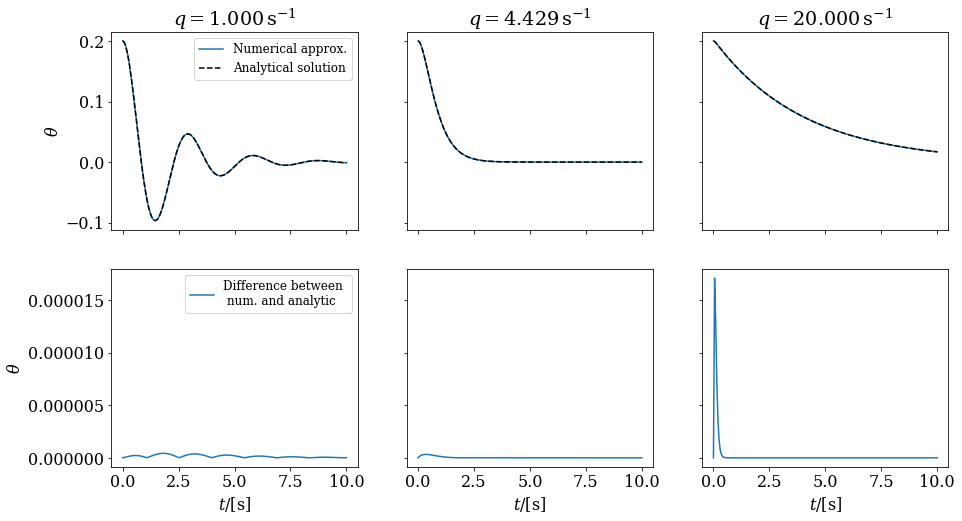

In [8]:
qs = [1, 2 * w0, 20]

T = 10
n = 201
t = np.linspace(0, T, n)
dt = t[1] - t[0]
print("dt = : {}".format(dt))

y = np.empty((len(qs), n, 2))

for i in range(len(qs)):
    y[i, 0] = y0
    for j in range(n - 1):
        RK4(
            y[i], f, dt, j, 
            qs[i]
        )

plotNumerics(t, y, qs)

### Work done by dampening

The dampening force is given by
$$
    F_d = - q m l\dot \theta,
$$
so that the work done by the dampening is
$$
    W = \int_0^{s(t)} F_d \mathrm{d}s = - mql^2 \int_0^t {\dot \theta}^2 d\mathrm{t}.
$$
We can thus find an aproximation for the work done after $n$ steps by
$$
    W_n = -qml^2\Delta t \sum_{i = 1}^{n} \dot \theta_n^2
$$

### Energy

The energy in the system is given by
$$
    E = \frac{1}{2} m l^2 \big((\dot \theta)^2 + (\omega_0\theta)^2\big)
$$

In [9]:
def work(y, q, dt):
    return -q*m*l**2*dt * np.add.accumulate(y[:, 1]**2)

def energy(y):
    return 1/2*m*l**2 * (y[:, 1]**2 + (w0)**2 * y[:, 0]**2)

In [10]:
def plotWork(t, y, qs):
    n = len(y)
    fig, ax = plt.subplots(1, n, figsize=(15, 4), sharey = True)
    
    for i in range(n):
        ax[i].plot(t, -work(y[i], qs[i], dt), label = "$W$")
        ax[i].plot(t, energy(y[i]), label = "$E$")
        ax[i].plot(t, energy(y[i]) - work(y[i], qs[i], dt), "k--", label = "$E - W$")
        ax[i].set_title("$q = {:.3f}$".format(qs[i]) + "$\\, \\mathrm{s}^{-1}$")
        ax[i].set_xlabel("$t / [\\mathrm{s}]$")
    
    ax[0].set_ylabel("$\\theta$")

    
    ax[0].legend()
    plt.show()

dt = : 0.1


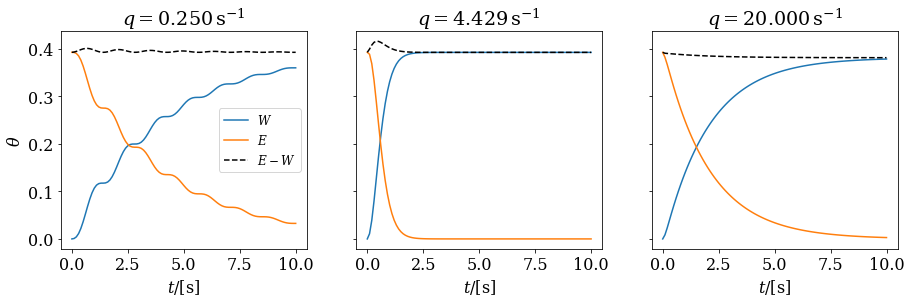

dt = : 0.01


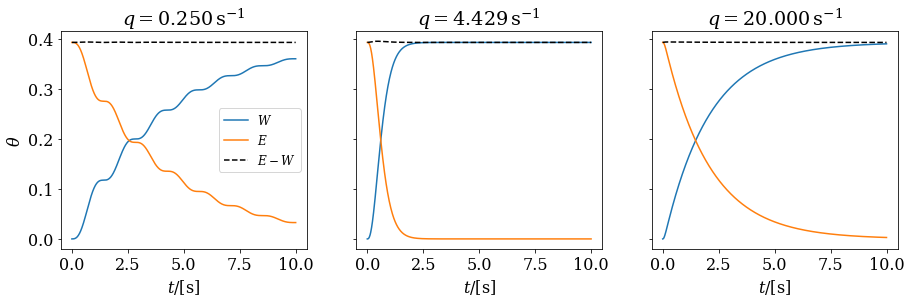

In [11]:
qs = [0.25, 2 * w0, 20]
ns = [101, 1001]
for n in ns:
    T = 10
    t = np.linspace(0, T, n)
    dt = t[1] - t[0]
    print("dt = : {}".format(dt))

    y = np.empty((len(qs), n, 2))

    for i in range(len(qs)):
        y[i, 0] = y0
        for j in range(n-1):
            RK4(y[i], f, dt, j, qs[i])

    plotWork(t, y, qs)

We can see we are loosing some energy due to the long step length.

# Driven oscillator

### Analytic solution
If we introduce a sinusiodal driving force, the differential equation becomes
$$
    \frac{\mathrm{d}^2\theta}{\mathrm{d} t^2} + q \frac{\mathrm{d}\theta}{\mathrm{d} t} + \omega_0^2 \theta = F_d \sin(\omega_d t).
$$

A trial solution for the non-homogenous part of the equation is $\theta_n = A cos(\omega_d t) + B sin(\omega_d t)$, yielding the equations
$$
    F_d = B \omega_0^2 - B \omega_d^2 - A\omega_dq, \quad 0 = - A \omega_d^2 + A \omega_0^2 + B\omega_dq \\
    \implies A  = F_d \frac{-q\omega_d}{(\omega_0^2 - \omega_d^2)^2 + (q\omega_d)^2},  B = F_d \frac{\omega_0^2 - \omega_d^2}{(\omega_0^2 - \omega_d^2)^2 + (q\omega_d)^2}\\
$$
$$
    \theta_n = \frac{F_d ( -q\omega_d cos(\omega_d t) + (\omega_0^2 - \omega_d^2) sin(\omega_d t))}{(\omega_0^2 - \omega_d^2)^2 - (q\omega_d)^2}.
$$

This can be rewritten as

$$
    \theta_n(t) = C cos(\omega t + \phi) \\
    C = \frac{F_d}{\sqrt{(\omega_0^2 - \omega_d^2)^2 + (q\omega_d)^2}}, \quad \phi = -\arctan\bigg({\frac{\omega_0^2 - \omega_d^2}{-q \omega_d}} \bigg)
$$

The full solution then becomes the sum of the homogenous solution, $\theta_h$, and the non-homogenous $\theta_n$. Since $\theta_n$ has its own starting conditions, we need to adjust the initial values of $\theta_h$
$$
    \theta(0) = \theta_h(0) + \theta_n(0) = \theta_h(0) + C cos(\phi) = \theta_0, \quad \dot \theta(0) = \dot \theta_h(0) + \dot \theta_n(0) = \dot \theta_h(0) - \omega C \sin(\phi) = 0, \\
    \implies \theta_h(0) = \theta_0 - C cos(\phi), \quad \dot \theta_h(0) = + \omega C \sin(\phi)
$$
Giving new initial conditions for the homogenous equation.

In [12]:
def fd(y, *args):
    t, q, wd = args
    
    return np.array([
        y[1], 
        -q * y[1] - w0**2 * y[0] + Fd * sin(wd * t)
    ])

def theta_n(t, q, wd):
    C = Fd / sqrt((w0**2 - wd**2)**2 + (q*wd)**2)
    phi = np.arctan2(-(w0**2 - wd**2), -q*wd)
    return  C * cos(wd*t + phi)

def init(q, wd):
    C = Fd / sqrt((w0**2 - wd**2)**2 + (q*wd)**2)
    phi = np.arctan2((w0**2 - wd**2), -q*wd)
    return (q, theta_0 - C * cos(phi), wd * C * sin(phi))

def getThetaDriven(q, wd):
    return lambda x: getTheta(*init(q, wd))(x) + theta_n(x, q, wd)

dt = : 0.01
Underdamped
Critically damped
Overdamped


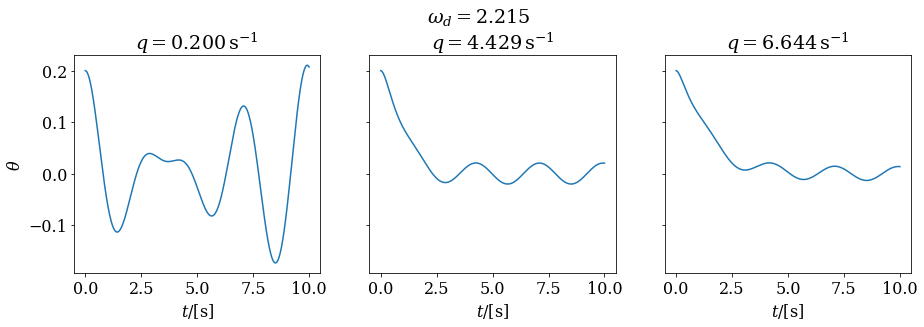

In [13]:
T = 10
n = 1001
t = np.linspace(0, T, n)
dt = t[1] - t[0]
print("dt = : {}".format(dt))

qs = [0.2, 2*w0, 3 * w0]

wd = w0
thetas = []
for j in range(len(qs)):
    thetas.append(getThetaDriven(qs[j], wd))
plotAnalytical(t, thetas, qs, "$\omega_d = {:.3f}$".format(wd))

### Numerics

The function for Runge-Kutta methods becomes

$$
    f(y, t) = 
    \begin{pmatrix}
        \dot \theta \\
        -q \dot \theta - \omega_0^2 \theta + F_d sin(\omega_d t)
    \end{pmatrix}.
$$

In [14]:
def plotNumerics2(t, y, q, wds, title):
    n = len(y)
    fig, ax = plt.subplots(1, n, figsize = (15, 4), sharey = True)
    fig.suptitle(title, y = 1.07)
    for i in range(n):
        ax[i].plot(t, y[i, :, 0], "r", label = "Numerical approx.")
        ax[i].set_title("$\omega_d = {:.3f} \omega_0 $".format(wds[i] / w0))
        theta = getTheta(*init(q, wds[i]))(t) + theta_n(t, q, wds[i])
        ax[i].plot(t, theta, "k--", label = "Analytical solution")
        ax[i].set_xlabel("$t / [\\mathrm{s}]$")
    
    ax[0].set_ylabel("$\\theta$")

    ax[0].legend()
    plt.show(fig)

dt = : 0.12
[0.1 1.  1.9]
Underdamped
Underdamped
Underdamped


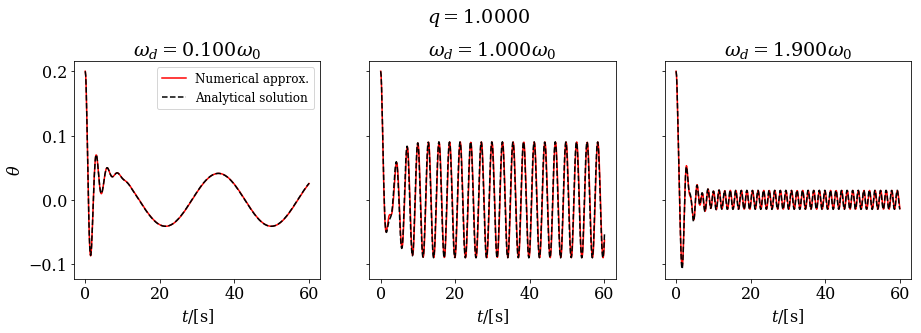

Underdamped
Underdamped
Underdamped


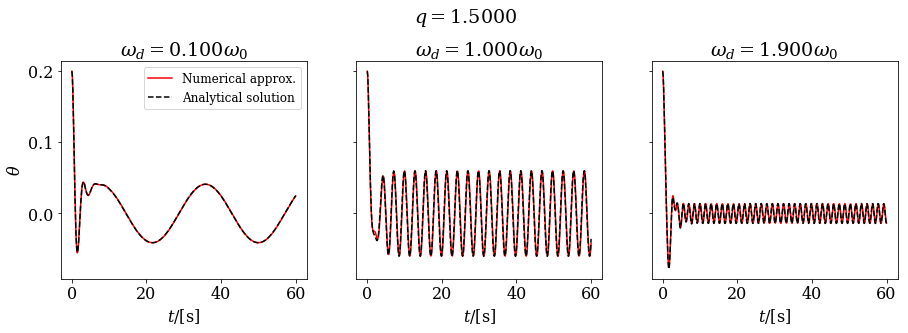

Critically damped
Critically damped
Critically damped


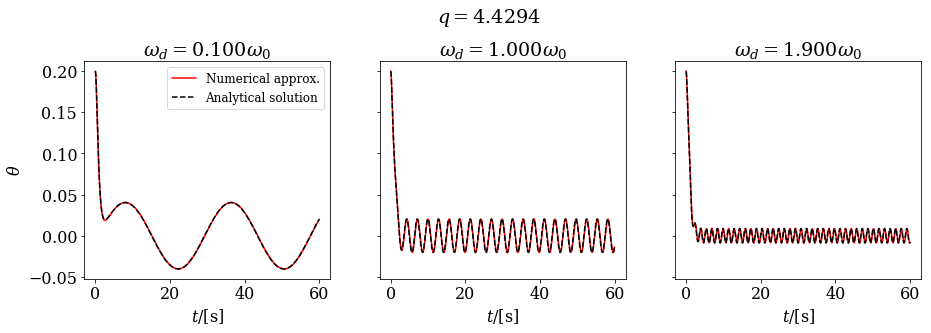

In [15]:
T = 60
n = 501
t = np.linspace(0, T, n)
dt = t[1] - t[0]
print("dt = : {}".format(dt))

N = 3
wds = np.linspace(0.1, 1.9, N) * w0
qs = [1, 1.5, w0*2]
print(wds / w0)
y = np.empty((N, n, 2))

for k in range(len(qs)):
    y = np.empty((N, n, 2))
    q = qs[k]
    for i in range(N):
        y[i, 0] = y0
        for j in range(n-1):
            RK4(y[i], fd, dt, j, 
                t[j], q, wds[i])

    plotNumerics2(t, y, q, wds, "$q = {:.4f}$".format(q))

We can see here that for different forcing-frequncies and different friciton parametres, we get different amplitudes for the steady-state solution. For low values of $q$, the amplitude is highest when $w_0 = w_d$. This is resonance. This means that, for pendulumes with low friction, you get the highest amplitude when pushing it at its natural frequency. This becomes more apparant in a bode-plot.

In [16]:
def getAnalyticalBode(wds, qs):
    N = len(wds)
    M = len(qs)
    A = np.empty((M, N))
    for k in range(M):
        q = qs[k]
        y = np.empty((N, n, 2))
        for i in range(N):
            wd = wds[i]
            period = 2 * pi / (wd)
            t = np.linspace(0, period, 100) 
            A[k, i] = np.max(np.abs(theta_n(t, q, wd)))
    return A

def getNumericalBode(wd, qs):
    N = len(wds)
    M = len(qs)
    A = np.empty((M, N))
    for k in range(M):
        q = qs[k]
        for i in range(N):
            y = np.empty((n, 2))
            y[0] = y0
            wd = wds[i]
            period = 2 * pi / (wd)
            K = int((T - period) / dt)
            for j in range(n-1):
                args = (t[j], q, wd)
                RK4(y, fd, dt, j, *args)  
            A[k, i] = np.max(np.abs(y[K:, 0]))
    return A
    

def bodePlot(wds, qs, A, title):
    N = len(wds)
    M = len(qs)
    
    fig, ax = plt.subplots(figsize = (15, 8))
    ax.set_ylabel("$Steady state amplitude$")
    ax.set_xlabel("$\\omega_d / \omega_0$")
    fig.suptitle(title)

    for k in range(M):
        ax.plot(wds / w0, A[k], color = cm.viridis(k / M), label = "q = {:.3f}".format(qs[k]))    

    plt.legend()
    plt.show()

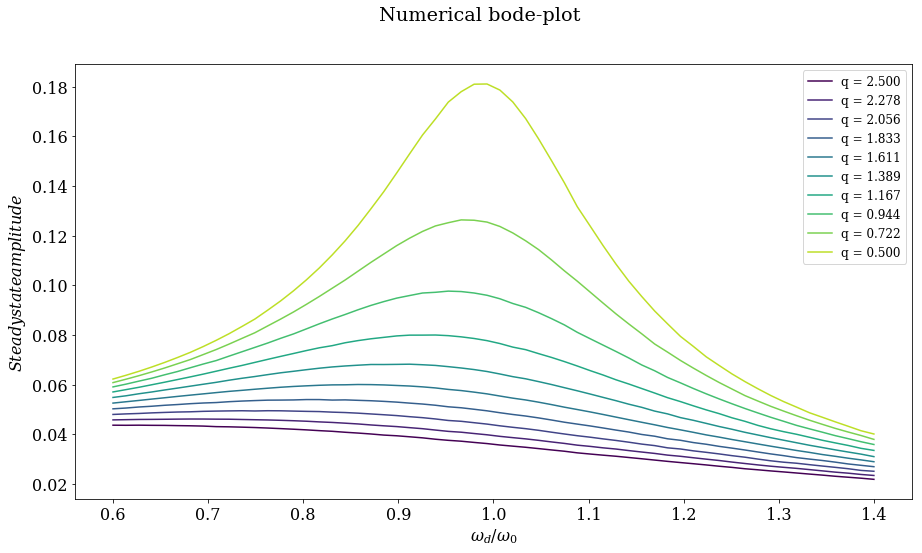

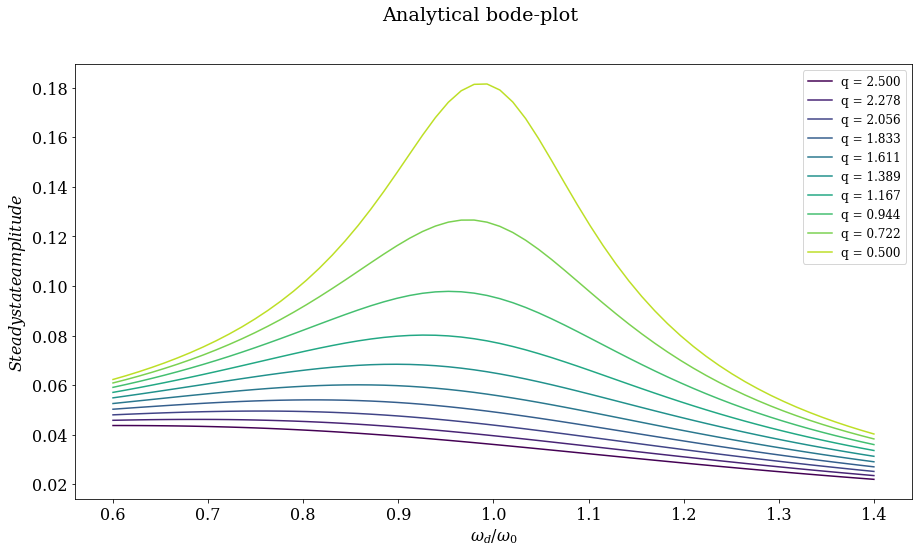

In [17]:
T = 50
n = 501
t = np.linspace(0, T, n)
dt = t[1] - t[0]

# Number of diffrent driving freq.
N = 60
# Number of diffrent dampening consts.
M = 10

wdRange = (0.6, 1.4)
wds = np.linspace(w0 * wdRange[0], w0 * wdRange[1], N)
qs = np.linspace(0.5, 2.5, M)[::-1]

bodePlot(wds, qs, getNumericalBode(wds, qs), "Numerical bode-plot")
bodePlot(wds, qs, getAnalyticalBode(wds, qs), "Analytical bode-plot")


### Extra:

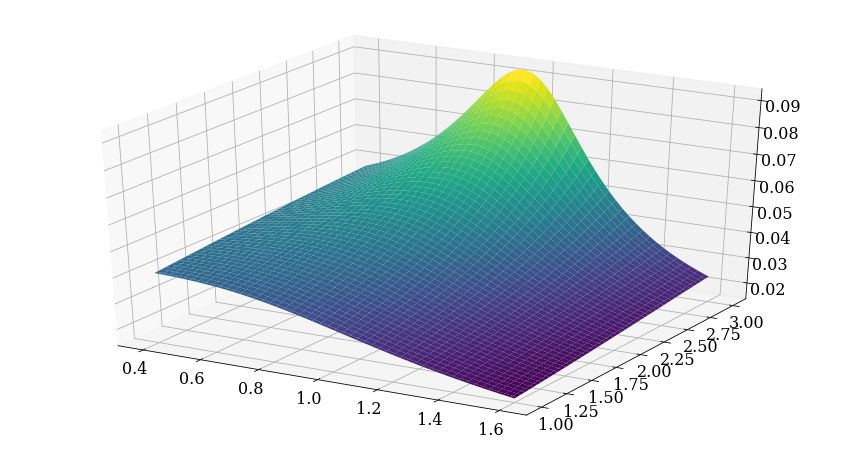

In [18]:
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(111, projection = "3d")
# Number of diffrent driving freq.
N = 100
# Number of diffrent dampening consts.
M = 100

wdRange = (0.6, 1.4)
wds = np.linspace(w0 * 0.4, w0 * 1.6, N)
qs = np.linspace(1, 3, M)

x, y = np.meshgrid(wds / w0, qs[::-1])
A = getAnalyticalBode(wds, qs)
ax.plot_surface(x, y, A, cmap = "viridis")
plt.show()